In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def get_visible_labels(img_v):
    # Histogram calculation is needed for labels calculation.
    hist_v = cv2.calcHist([img_v], [0], None, [256], [0, 256])
    #print('Type of hist_v is :', type(hist_v))
    #plt.plot(hist_v, color='r')
    #plt.title('hist_v')
    #plt.show()
    # https://www.pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/
    labels_v = []
    [labels_v.append(i) for i, l in enumerate(hist_v) if i!= 0 and l != 0]
    #print('Type of labels_v is :', type(labels_v))
    return labels_v

In [3]:
cwd = os.getcwd()  # Get the current working directory (cwd)
dir_path = sorted(os.listdir(cwd))  # Get all the files in that directory ordered alphabetically
#print("Files in %r: %s" % (cwd, dir_path))
print(dir_path)

['.ipynb_checkpoints', '100npy.ipynb', '1532900574142981998', 'Package_01_synthetic_1_1_im.png', 'Package_01_synthetic_1_1_rgb.png.jpg', 'Package_01_synthetic_3_4_im.png', 'Package_03_synthetic_1_2_im.png', 'bitwise_op.ipynb', 'colors.jpg', 'convert_to_jpg.ipynb', 'get_labels.ipynb', 'get_labels_func.ipynb', 'get_mask_func.ipynb', 'labels_o.npy', 'labels_v.npy', 'load_everything.ipynb', 'load_mask.ipynb', 'load_npy.ipynb', 'masks_npy', 'naming_grouping.ipynb', 'original_dataset', 'prototyping.ipynb']


In [4]:
normalizing_int = 4
class_num = []

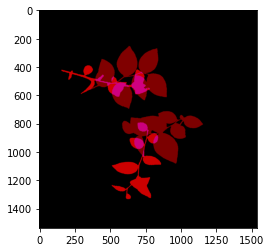

[3, 5]


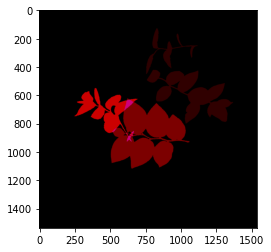

[1, 3, 5]


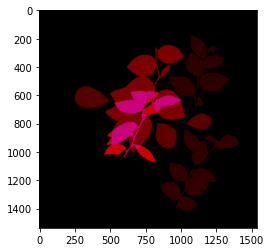

[1, 2, 3, 5]
total class numbers in the images:  [1, 2, 3, 5]


In [7]:
for image_index, image_name in enumerate(dir_path):
    if image_name.endswith("im.png"):
        img = cv2.imread(image_name)
        plt.imshow(img)
        plt.show()
        labels_v = get_visible_labels(img) # get the labels in a list
        n_labels = [int(element/normalizing_int) for element in labels_v]
        # add the class numbers to a list
        for i in n_labels:
            first_int = int(str(i)[0])
            class_num.append(first_int)
            class_num = list(set(class_num)) # removes duplicates
        print(class_num) # list
print("total class numbers in the images: ", class_num)

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
print('visible labels are: ',labels_v)
print('Normalized lables are: ', n_labels)

In [ ]:
"""
forget about it right now, I need the classes first and most importantly, then I will look into how different
instances of the same class are denoted in the ground truth dataset.
"""
instances = [] # answer should be 1 and 2 for class 3 and 1 and 2 for class 5,
# a dictionary would be a good way to save it.
for i in n_labels:
    first_int = int(str(i)[0])
    second_int = int(str(i)[1])
    
    class_num.append(second_int)
    class_num = list(set(class_num)) # removes duplicates

In [ ]:
def get_unique_labels(instance_mask, exclude_zero=False):
    instance_mask = instance_mask.astype(np.uint8)

    hist = cv2.calcHist([instance_mask], [0], None, [256], [0, 256])
    instances_ids = (np.nonzero(hist))[0]
    if exclude_zero:
        instances_ids = instances_ids[instances_ids > 0]
    return instances_ids.tolist()

   
def get_instances(cutting_mask): # give it only one channel, channel 1 or 3
        instances_ids = get_unique_labels(cutting_mask, exclude_zero=True)
        instances_mask = {}
        instances_img = {}
        for instances_id in instances_ids:
            mask = cutting_mask == instances_id
            mask = mask.astype(np.uint8)
            instances_mask[instances_id] = cv2.bitwise_and(cutting_mask, cutting_mask, mask=mask * 255)

        return instances_mask

mask = cv2.imread('name.png')

masks = get_instances(mask)